In [1]:
#Importing important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Import excel file
df = pd.read_excel("Budget_Allocation.xlsx")


In [3]:
#Check dataset range
df.shape

(2360, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PRDT TYPE           2360 non-null   object 
 1   BRAND               2360 non-null   object 
 2   MILESTONE           2360 non-null   object 
 3   TARGET_GROUP        2360 non-null   object 
 4   CAMPAIGN_MONTH      2360 non-null   object 
 5   SELECTED_QTY        2360 non-null   int64  
 6   MAILED_COUNT        2360 non-null   int64  
 7   RESPONSE_COUNT      2360 non-null   int64  
 8   RESPONSE_SALES_AMT  2360 non-null   float64
 9   CUST_SEGMENT        2360 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 184.5+ KB


#Clean data

In [5]:
df.isnull().sum()

,0
PRDT TYPE,0
BRAND,0
MILESTONE,0
TARGET_GROUP,0
CAMPAIGN_MONTH,0
SELECTED_QTY,0
MAILED_COUNT,0
RESPONSE_COUNT,0
RESPONSE_SALES_AMT,0
CUST_SEGMENT,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
month_map = {
    'JANUARY':0,
    'FEBRUARY':1,
    'MARCH':2,
    'APRIL':3,
    'MAY':4,
    'JUNE':5,
    'JULY':6,
    'AUGUST':7,
    'SEPTEMBER':8,
    'OCTOBER':9,
    'NOVEMBER':10,
    'DECEMBER':11
}
df['CAMPAIGN_MONTH'] = df['CAMPAIGN_MONTH'].str.upper().map(month_map)

In [8]:
df

,PRDT TYPE,BRAND,MILESTONE,TARGET_GROUP,CAMPAIGN_MONTH,SELECTED_QTY,MAILED_COUNT,RESPONSE_COUNT,RESPONSE_SALES_AMT,CUST_SEGMENT
0,Prdt-1,B,12 Months,Targeted,7,809,809,98,23323.47,CLClubInvite12
1,Prdt-1,B,12 Months,Control,7,90,90,3,686.98,CLClubInvite12Control
2,Prdt-1,B,12 Months,Targeted,7,1769,1769,142,30641.22,CLRecall12
3,Prdt-1,B,12 Months,Control,7,196,196,16,3261.56,CLRecall12Control
4,Prdt-1,B,12 Months,Targeted,7,205,205,16,2848.48,CLRecallTXandCA12
...,...,...,...,...,...,...,...,...,...,...
2355,Prdt-2,E,27 Months,Control,9,794,1,0,0.00,RecallNONFirstSight-CG
2356,Prdt-2,E,27 Months,Targeted,9,64494,36,0,0.00,RecallNONFirstSight-TG
2357,Prdt-2,E,27 Months,Targeted,9,71670,34,0,0.00,RecallNONFirstSight-TG
2358,Prdt-2,E,27 Months,Targeted,9,94402,1313,6,398.00,RecallNONFirstSight-TG


In [9]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [10]:
df

,prdt_type,brand,milestone,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,cust_segment
0,Prdt-1,B,12 Months,Targeted,7,809,809,98,23323.47,CLClubInvite12
1,Prdt-1,B,12 Months,Control,7,90,90,3,686.98,CLClubInvite12Control
2,Prdt-1,B,12 Months,Targeted,7,1769,1769,142,30641.22,CLRecall12
3,Prdt-1,B,12 Months,Control,7,196,196,16,3261.56,CLRecall12Control
4,Prdt-1,B,12 Months,Targeted,7,205,205,16,2848.48,CLRecallTXandCA12
...,...,...,...,...,...,...,...,...,...,...
2355,Prdt-2,E,27 Months,Control,9,794,1,0,0.00,RecallNONFirstSight-CG
2356,Prdt-2,E,27 Months,Targeted,9,64494,36,0,0.00,RecallNONFirstSight-TG
2357,Prdt-2,E,27 Months,Targeted,9,71670,34,0,0.00,RecallNONFirstSight-TG
2358,Prdt-2,E,27 Months,Targeted,9,94402,1313,6,398.00,RecallNONFirstSight-TG


In [11]:
df = df[['prdt_type', 'brand', 'milestone', 'cust_segment', 'target_group',
         'campaign_month', 'selected_qty', 'mailed_count',
         'response_count', 'response_sales_amt']]


In [12]:
df

,prdt_type,brand,milestone,cust_segment,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt
0,Prdt-1,B,12 Months,CLClubInvite12,Targeted,7,809,809,98,23323.47
1,Prdt-1,B,12 Months,CLClubInvite12Control,Control,7,90,90,3,686.98
2,Prdt-1,B,12 Months,CLRecall12,Targeted,7,1769,1769,142,30641.22
3,Prdt-1,B,12 Months,CLRecall12Control,Control,7,196,196,16,3261.56
4,Prdt-1,B,12 Months,CLRecallTXandCA12,Targeted,7,205,205,16,2848.48
...,...,...,...,...,...,...,...,...,...,...
2355,Prdt-2,E,27 Months,RecallNONFirstSight-CG,Control,9,794,1,0,0.00
2356,Prdt-2,E,27 Months,RecallNONFirstSight-TG,Targeted,9,64494,36,0,0.00
2357,Prdt-2,E,27 Months,RecallNONFirstSight-TG,Targeted,9,71670,34,0,0.00
2358,Prdt-2,E,27 Months,RecallNONFirstSight-TG,Targeted,9,94402,1313,6,398.00


In [13]:
df.to_csv("cleaned_Budget_Allocation.csv", index=False)

#Step 2: Exploratory Data Analysis (EDA)

In [14]:
#Basic Summary
df.describe()

,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt
count,2360.000000,2.360000e+03,2360.000000,2360.000000,2360.000000
mean,6.647458,1.438556e+04,1361.769915,46.643644,10063.757712
std,3.348785,1.165510e+05,2557.967184,111.125220,23826.166367
min,0.000000,6.000000e+00,1.000000,0.000000,0.000000
25%,5.000000,3.167500e+02,146.000000,3.000000,684.052500
50%,7.000000,1.474000e+03,365.500000,12.000000,2642.230000
75%,9.000000,6.698250e+03,1491.000000,43.000000,9875.657500
max,11.000000,2.599002e+06,24341.000000,2541.000000,572875.430000


In [15]:
# Categorical overview
df.select_dtypes(include='object').nunique()


,0
prdt_type,2
brand,4
milestone,6
cust_segment,382
target_group,2


###Univariate Analysis

<Axes: >

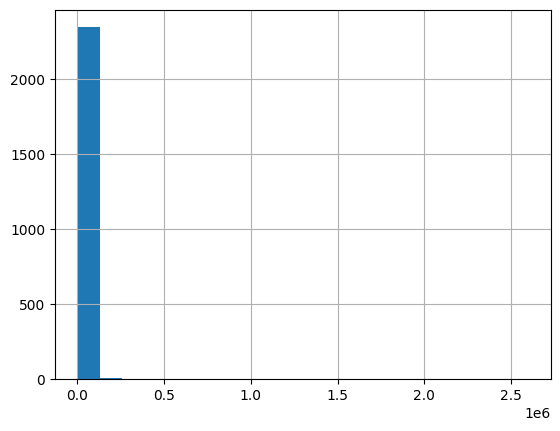

In [16]:
#Distribution of selected_qty
df['selected_qty'].hist(bins=20)

<Axes: xlabel='campaign_month'>

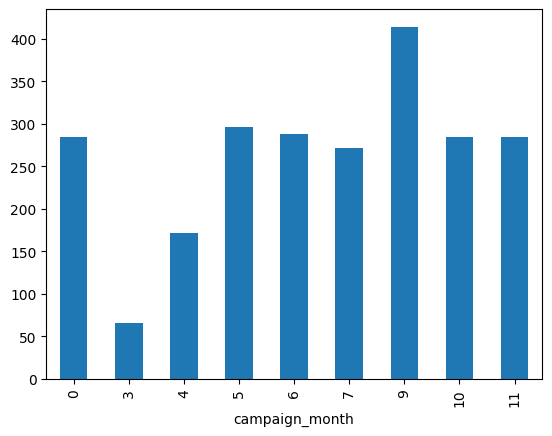

In [17]:
#Bar plot of campaign_month
df['campaign_month'].value_counts().sort_index().plot(kind = 'bar')

##Bivariate Analysis

<Axes: xlabel='mailed_count', ylabel='response_count'>

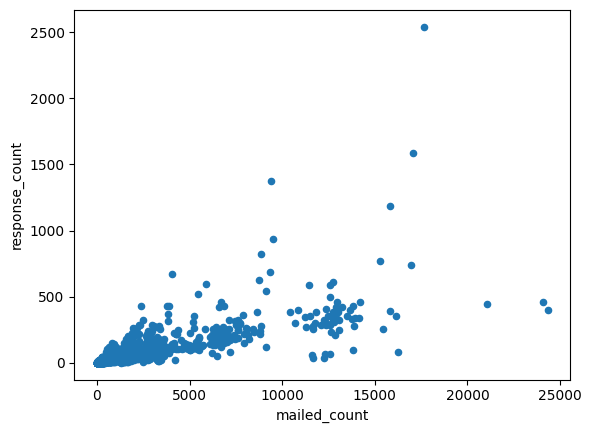

In [18]:
df.plot.scatter(x='mailed_count', y= 'response_count')

<Axes: xlabel='target_group'>

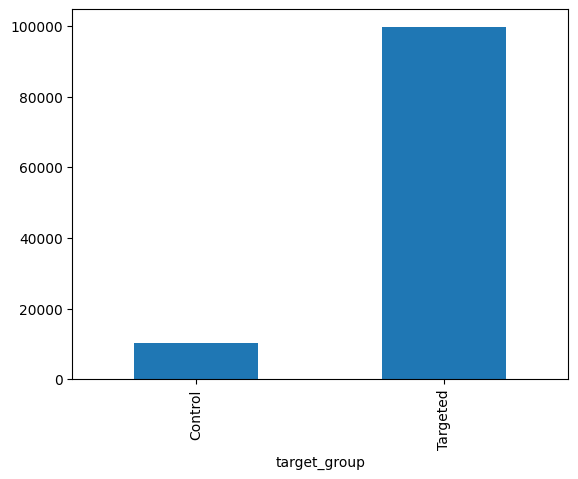

In [19]:
df.groupby('target_group')['response_count'].sum().plot(kind='bar')

<Axes: xlabel='cust_segment'>

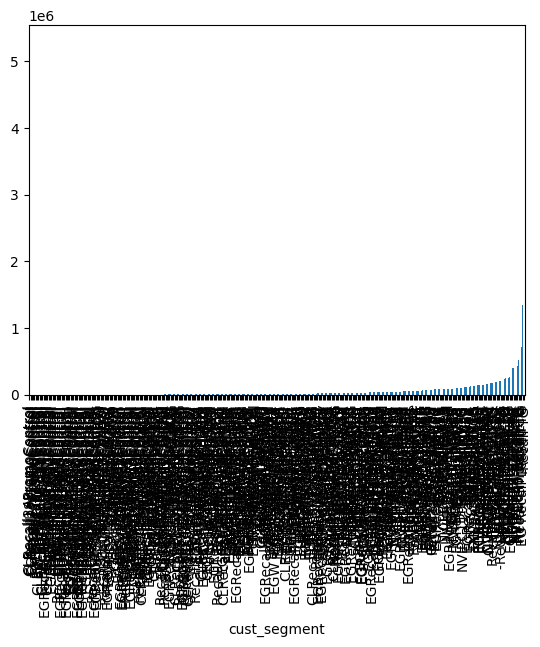

In [20]:
# Sales by customer segment
df.groupby('cust_segment')['response_sales_amt'].sum().sort_values().plot(kind='bar')

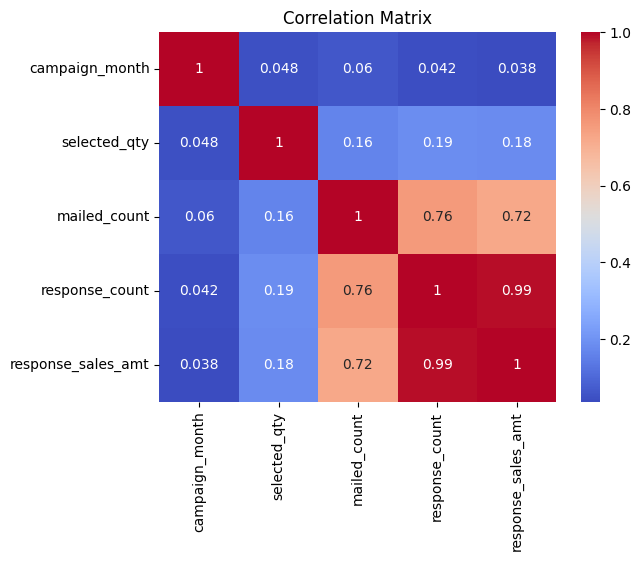

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#Define the Target Variable

In [22]:
# Create binary target
df['response'] = (df['response_count'] > 0).astype(int)


In [23]:
df

,prdt_type,brand,milestone,cust_segment,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,response
0,Prdt-1,B,12 Months,CLClubInvite12,Targeted,7,809,809,98,23323.47,1
1,Prdt-1,B,12 Months,CLClubInvite12Control,Control,7,90,90,3,686.98,1
2,Prdt-1,B,12 Months,CLRecall12,Targeted,7,1769,1769,142,30641.22,1
3,Prdt-1,B,12 Months,CLRecall12Control,Control,7,196,196,16,3261.56,1
4,Prdt-1,B,12 Months,CLRecallTXandCA12,Targeted,7,205,205,16,2848.48,1
...,...,...,...,...,...,...,...,...,...,...,...
2355,Prdt-2,E,27 Months,RecallNONFirstSight-CG,Control,9,794,1,0,0.00,0
2356,Prdt-2,E,27 Months,RecallNONFirstSight-TG,Targeted,9,64494,36,0,0.00,0
2357,Prdt-2,E,27 Months,RecallNONFirstSight-TG,Targeted,9,71670,34,0,0.00,0
2358,Prdt-2,E,27 Months,RecallNONFirstSight-TG,Targeted,9,94402,1313,6,398.00,1


In [24]:
#Encode Categorical Features


In [25]:
cat_cols =['prdt_type','brand','milestone','target_group']
le = LabelEncoder()
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [26]:
df

,prdt_type,brand,milestone,cust_segment,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,response
0,0,0,0,CLClubInvite12,1,7,809,809,98,23323.47,1
1,0,0,0,CLClubInvite12Control,0,7,90,90,3,686.98,1
2,0,0,0,CLRecall12,1,7,1769,1769,142,30641.22,1
3,0,0,0,CLRecall12Control,0,7,196,196,16,3261.56,1
4,0,0,0,CLRecallTXandCA12,1,7,205,205,16,2848.48,1
...,...,...,...,...,...,...,...,...,...,...,...
2355,1,3,5,RecallNONFirstSight-CG,0,9,794,1,0,0.00,0
2356,1,3,5,RecallNONFirstSight-TG,1,9,64494,36,0,0.00,0
2357,1,3,5,RecallNONFirstSight-TG,1,9,71670,34,0,0.00,0
2358,1,3,5,RecallNONFirstSight-TG,1,9,94402,1313,6,398.00,1


In [27]:
cat_cols =['cust_segment']
le = LabelEncoder()
for col in cat_cols:
  df[col] = le.fit_transform(df[col])

In [28]:
df

,prdt_type,brand,milestone,cust_segment,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,response
0,0,0,0,6,1,7,809,809,98,23323.47,1
1,0,0,0,7,0,7,90,90,3,686.98,1
2,0,0,0,16,1,7,1769,1769,142,30641.22,1
3,0,0,0,19,0,7,196,196,16,3261.56,1
4,0,0,0,80,1,7,205,205,16,2848.48,1
...,...,...,...,...,...,...,...,...,...,...,...
2355,1,3,5,380,0,9,794,1,0,0.00,0
2356,1,3,5,381,1,9,64494,36,0,0.00,0
2357,1,3,5,381,1,9,71670,34,0,0.00,0
2358,1,3,5,381,1,9,94402,1313,6,398.00,1


# Feature Selection

In [29]:
features = [col for col in df.columns if col not in ['response_count', 'response_sales_amt', 'response']]
X = df[features]
y = df['response']

#Model Training – Logistic Regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.38      0.53        39
           1       0.95      0.99      0.97       433

    accuracy                           0.94       472
   macro avg       0.89      0.69      0.75       472
weighted avg       0.94      0.94      0.93       472



#Feature Importance


In [31]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).head(10)


,0
mailed_count,2.524991e-02
cust_segment,6.911093e-05
selected_qty,8.512355e-07
campaign_month,-4.398275e-02
target_group,-1.967478e-01
prdt_type,-2.606745e-01
brand,-3.260806e-01
milestone,-3.925297e-01


#Budget Optimization (Optional – Strategic)

In [32]:
# Add predicted probabilities
df['predicted_prob'] = model.predict_proba(X)[:, 1]

# Compute expected ROI
df['expected_roi'] = df['predicted_prob'] * df['response_sales_amt']

# Sort and prioritize
top_campaigns = df.sort_values(by='expected_roi', ascending=False)


In [33]:
top_campaigns

,prdt_type,brand,milestone,cust_segment,target_group,campaign_month,selected_qty,mailed_count,response_count,response_sales_amt,response,predicted_prob,expected_roi
2213,1,3,0,105,1,9,540820,17630,2541,572875.43,1,1.000000,572875.43
2212,1,3,0,105,1,9,688020,17078,1587,346568.74,1,1.000000,346568.74
2216,1,3,0,351,1,9,185444,9415,1374,314938.55,1,1.000000,314938.55
1800,1,3,0,355,1,11,210346,15846,1184,253719.21,1,1.000000,253719.21
1801,1,3,0,355,1,11,93628,9530,936,205547.40,1,1.000000,205547.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,1,2,5,102,0,9,1591,61,0,0.00,0,0.406621,0.00
1071,1,0,0,231,0,6,77,77,0,0.00,0,0.941609,0.00
1589,1,2,5,225,0,7,59,59,0,0.00,0,0.417440,0.00
756,0,3,5,0,0,9,1249,179,0,0.00,0,0.926136,0.00
